<a href="https://colab.research.google.com/github/ZahraParvin/TTT4275/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [ ]:
class_mapping = {
    'Iris-setosa': np.array([1, 0, 0]),
    'Iris-versicolor': np.array([0, 1, 0]),
    'Iris-virginica': np.array([0, 0, 1])
}

In [ ]:
file_path = 'Iris_TTT4275/iris.data'

def import_data():
    feature_list = []
    species_list = []
    with open(file_path, 'r') as data:
        rows = data.readlines()
        for row in rows:
            row_values = row.strip().split(',')
            features = [float(i) for i in row_values[:-1]]
            species = row_values[-1]
            feature_list.append(features)
            features.append(1.0)
            species_list.append(class_mapping.get(species))
    feature_array = np.stack(feature_list)
    species_array = np.stack(species_list)
    return feature_array, species_array

In [ ]:
#Predicttion of each class returned as a vector
def squashing_function(iris_input, W):
    exponent = np.array([ np.exp(-(np.matmul(W, i))) for i in iris_input])
    sigmoid = 1/(1 + exponent)
    return sigmoid

In [ ]:
#Minimum Square Error function
def mse(g_k, t_k):
    error = sum((g_k-t_k)**2)/2
    return error

In [ ]:
# Weight Matrix
def weight(previous, alpha, grad_mse):
    W = previous - alpha*grad_mse.T
    return W

In [ ]:
#Gradient MSE
def delta_W_mse(g_k, t_k, iris_input):

    delta_zk_g = g_k * (1 - g_k)
    delta_gk_mse = g_k - t_k

    grad = np.dot(iris_input.T, delta_gk_mse * delta_zk_g)

    return grad

In [ ]:
#Training linear classifier
def linear_classifier(samples,t_k , iterations=1000,alpha=0.01):

    mse_values = []
    W = np.zeros((3 , samples.shape[1]))
    for i in range(iterations):
      g_k = squashing_function(samples, W)
      grad_mse = delta_W_mse(g_k,t_k,samples)
      W = weight(W, alpha, grad_mse)
      mse_values.append(mse(g_k, t_k))

    return mse_values, W


In [ ]:
def predict(X, W):
    probabilities = squashing_function(X, W)
    predictions = np.argmax(probabilities, axis=1)
    return predictions

In [ ]:
def error_rate(confusion_matrix):
  pp_sum = 0
  for i in range(len(confusion_matrix)):
    pp_sum += confusion_matrix[i, i]
  error = 1 - pp_sum / np.sum(confusion_matrix)
  #print(f'error rate = {100 * error:.1f}%')
  return error

In [ ]:
def cm_e_display(s,l,W):
  predicted = predict(s,W)
  actual = np.argmax(l, axis=1)

  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  e = error_rate(confusion_matrix)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
  cm_display.plot()
  if actual.shape[0] <  65 :
      plt.title('Testing Confusion matrix')
  else:
      plt.title('Training Confusion matrix')

  plt.show()
  print(f'error rate = {100 * e:.1f}%')

In [ ]:
features, labels = import_data()

train_sample = []
test_sample = []

train_label = []
test_label = []

train_sample.extend(features[0:30])
train_sample.extend(features[50:80])
train_sample.extend(features[100:130])

test_sample.extend(features[30:50])
test_sample.extend(features[80:100])
test_sample.extend(features[130:150])

train_label.extend(labels[0:30])
train_label.extend(labels[50:80])
train_label.extend(labels[100:130])

test_label.extend(labels[30:50])
test_label.extend(labels[80:100])
test_label.extend(labels[130:150])

t_l = np.stack(train_label)
t_s = np.stack(train_sample)
test_s = np.stack(test_sample)
test_l = np.stack(test_label)

mse_value, W =  (t_s, t_l)
print(W)

[[ 0.39064598  1.50732257 -2.25165604 -1.03725747  0.27496801]
 [ 1.3989633  -2.6662936  -0.06956884 -1.35028362  0.88490401]
 [-2.46961764 -2.01296706  3.58374136  2.9449683  -1.33004342]]


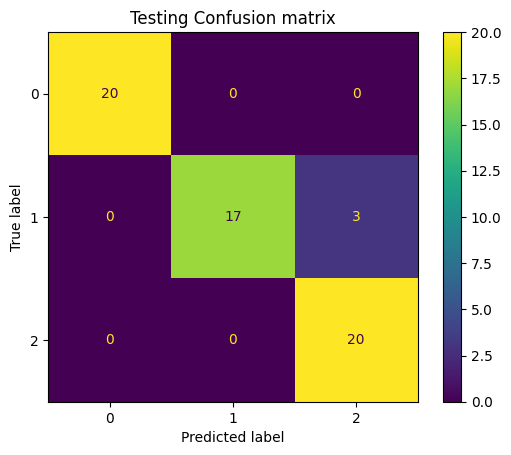

error rate = 5.0%


In [ ]:
cm_e_display(test_s,test_l,W)

In [ ]:
cm_e_display(t_s,t_l,W)

Part d: 20 first sampling and 30 last for training

In [ ]:
features, labels = import_data()

tr_sample = []
te_sample = []

tr_label = []
te_label = []

tr_sample.extend(features[20:50])
tr_sample.extend(features[70:100])
tr_sample.extend(features[120:150])

te_sample.extend(features[0:20])
te_sample.extend(features[50:70])
te_sample.extend(features[100:120])

tr_label.extend(labels[20:50])
tr_label.extend(labels[70:100])
tr_label.extend(labels[120:150])

te_label.extend(labels[0:20])
te_label.extend(labels[50:70])
te_label.extend(labels[100:120])

t_l4 = np.stack(tr_label)
t_s4 = np.stack(tr_sample)
test_s4 = np.stack(te_sample)
test_l4 = np.stack(te_label)

mse_value4, W4 = linear_classifier(t_s, t_l)

In [ ]:
cm_e_display(test_s4,test_l4,W4)

In [ ]:
cm_e_display(t_s4,t_l4,W4)

# Part 2

In [ ]:

color_palette = ['#FF5733', '#33FF57', '#5733FF']

# Define feature names
feature_names = {
    0: "Petal Length",
    1: "Petal Width",
    2: "Sepal Length",
    3: "Sepal Width",
    4: "Extra 1 feature"  # If you have an extra feature
}
# Plot histograms with KDE lines for each feature and species
for i in range(features.shape[1]):
    plt.figure()
    for idx, (species, color) in enumerate(zip(class_mapping.keys(), color_palette)):
        data = features[labels[:, class_mapping[species] == 1][:, 0] == 1, i]
        sns.histplot(data, color=color, label=species, kde=True, alpha=0.7, stat='density')
    plt.title(f'{feature_names[i]}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [ ]:
ts_3f = np.delete(t_s, 1, 1)
test_s_3f = np.delete(test_s, 1, 1)
mse_value_3f, W3f = linear_classifier(ts_3f, t_l)

In [ ]:
cm_e_display(test_s_3f,test_l,W3f)
cm_e_display(ts_3f,t_l,W3f)

with 2 features

In [ ]:
ts_2f = np.delete(ts_3f, 0, 1)
test_s_2f = np.delete(test_s_3f, 0, 1)
mse_value_2f, W2f = linear_classifier(ts_2f, t_l)

In [ ]:
cm_e_display(test_s_2f,test_l,W2f)
cm_e_display(ts_2f,t_l,W2f)


with 1 feature

In [ ]:
ts_1f = np.delete(ts_2f, 0, 1)
test_s_1f = np.delete(test_s_2f, 0, 1)
mse_value_1f, W1f = linear_classifier(ts_1f, t_l)

In [ ]:
cm_e_display(test_s_1f,test_l,W1f)
cm_e_display(ts_1f,t_l,W1f)